
# 1. Data Exploration:


In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print('DataFrame Info:')
df.info()

print('\nDescriptive Statistics:')
df.describe()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


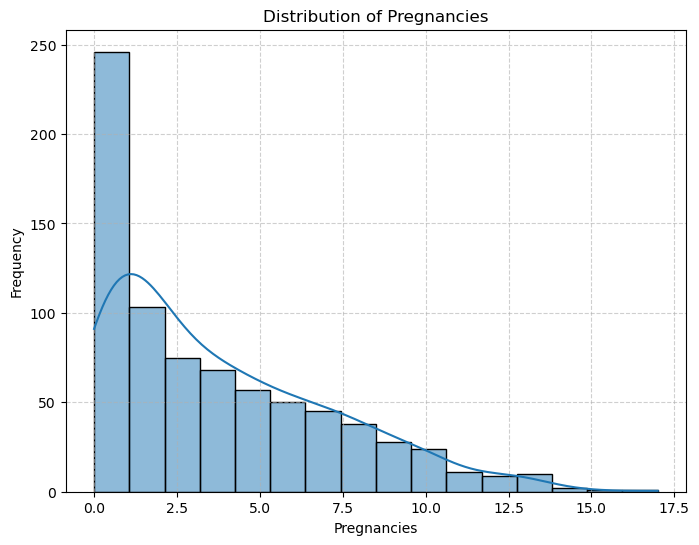

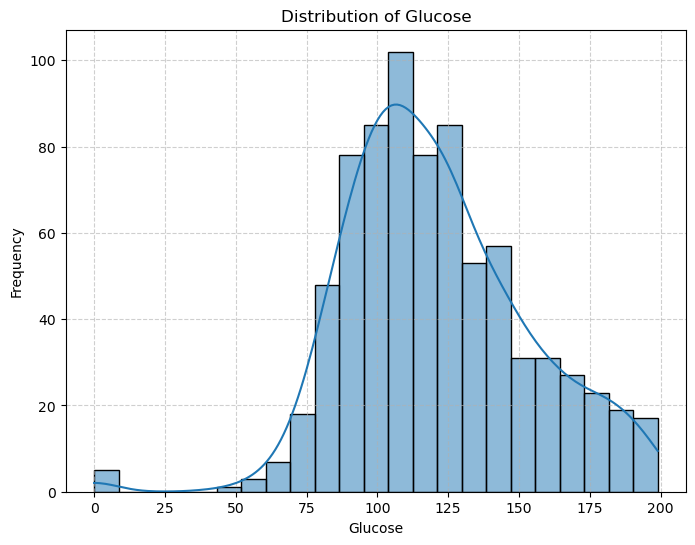

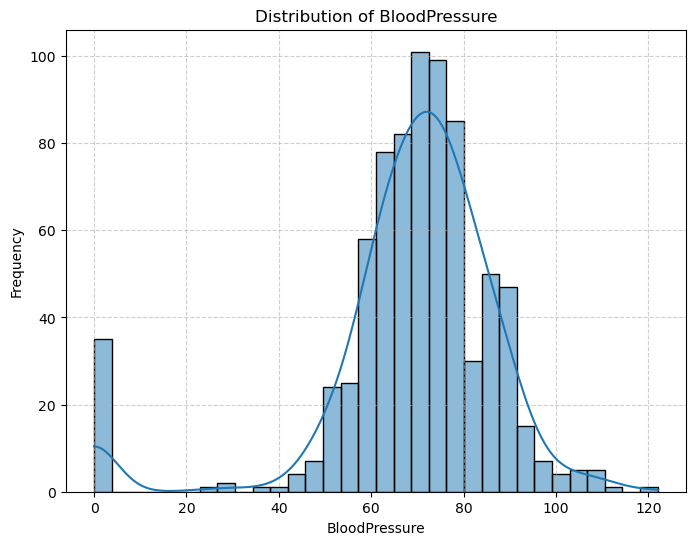

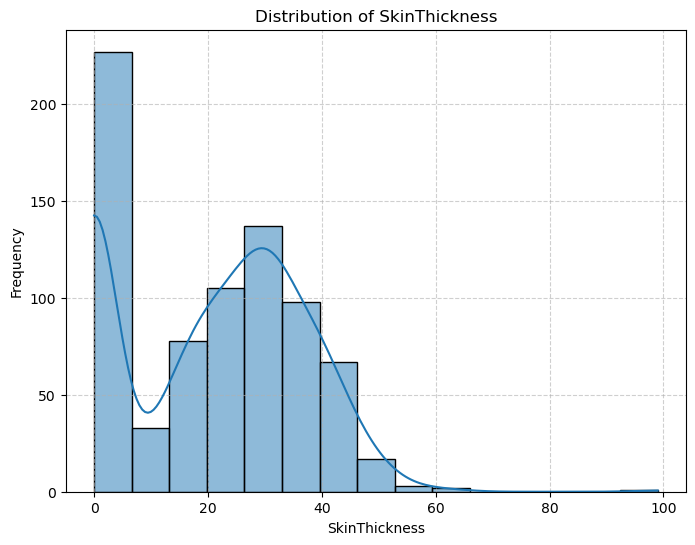

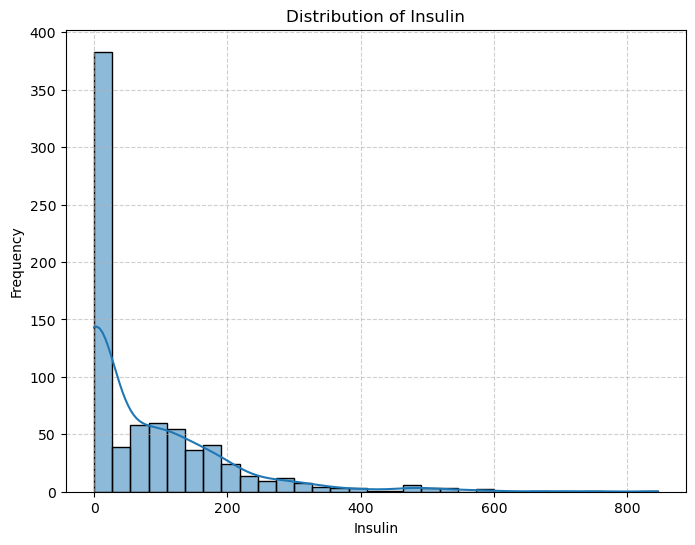

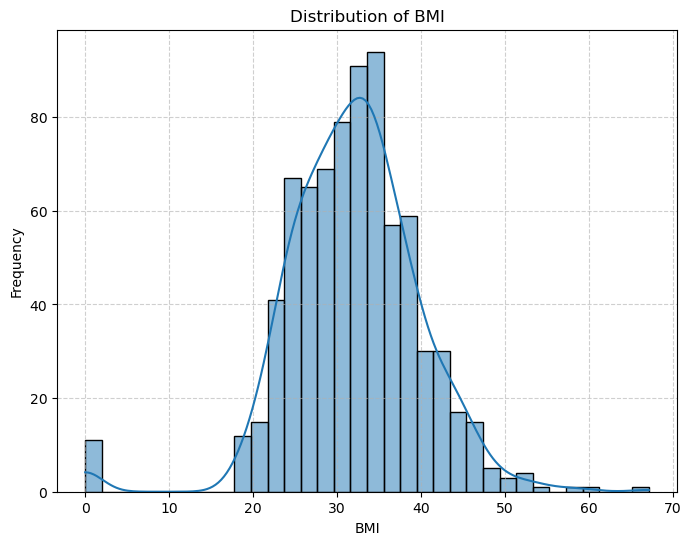

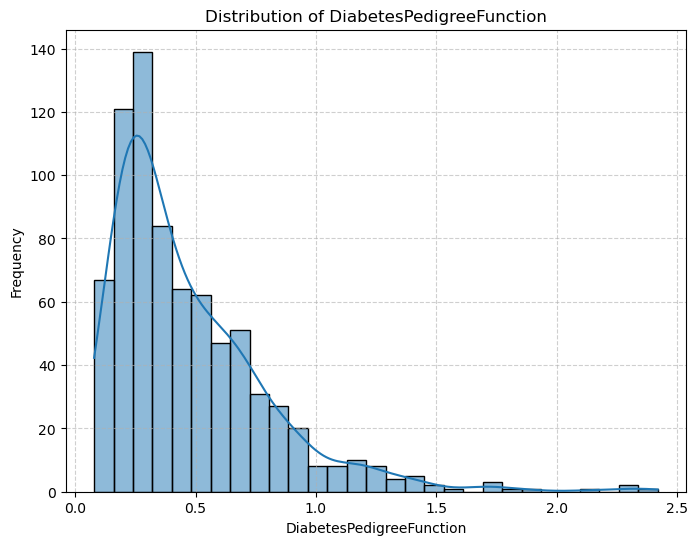

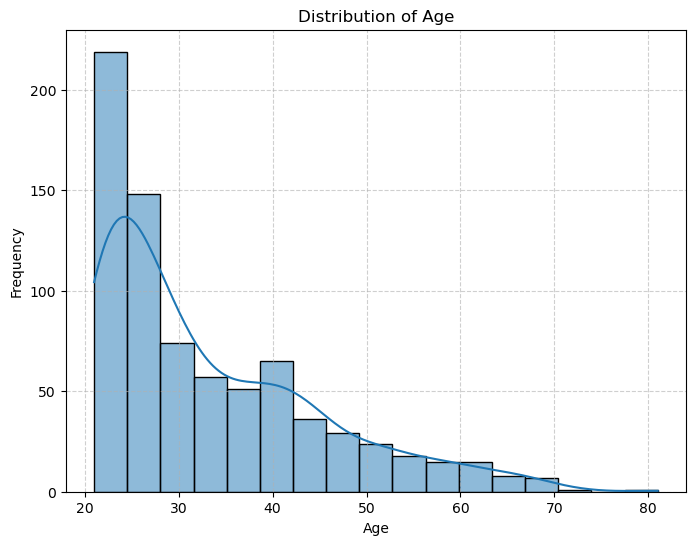

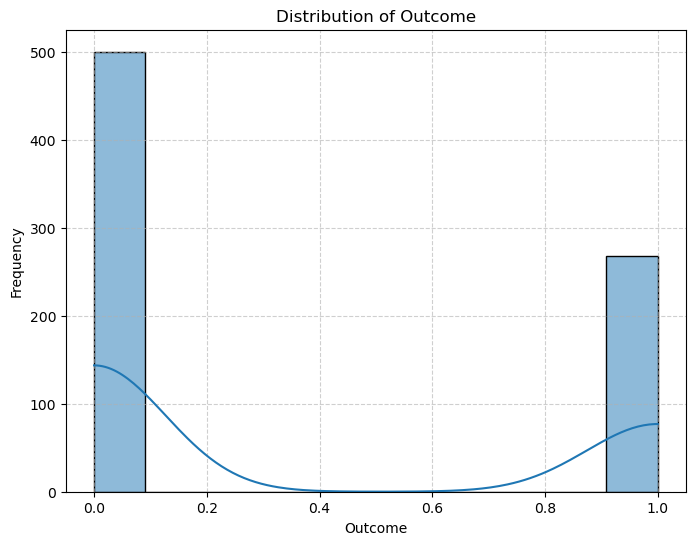

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

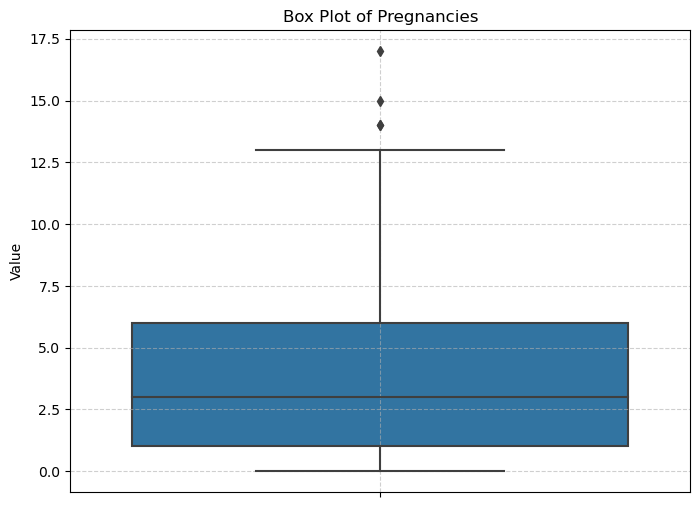

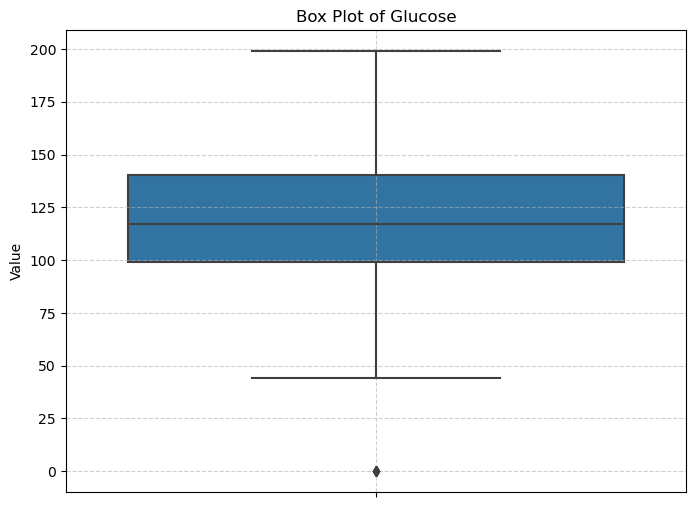

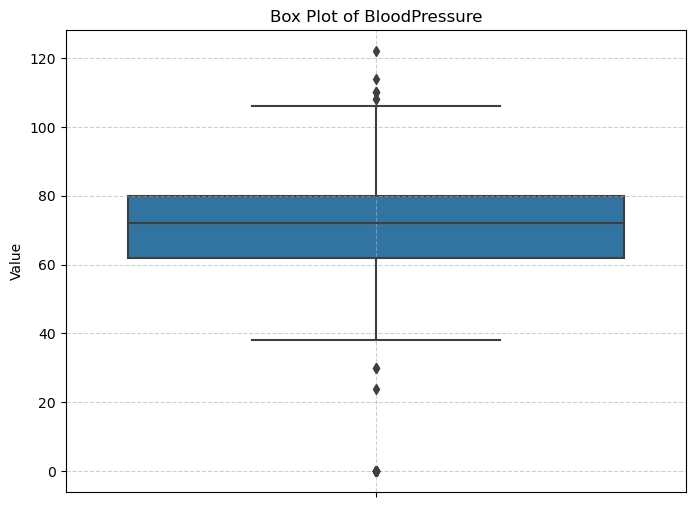

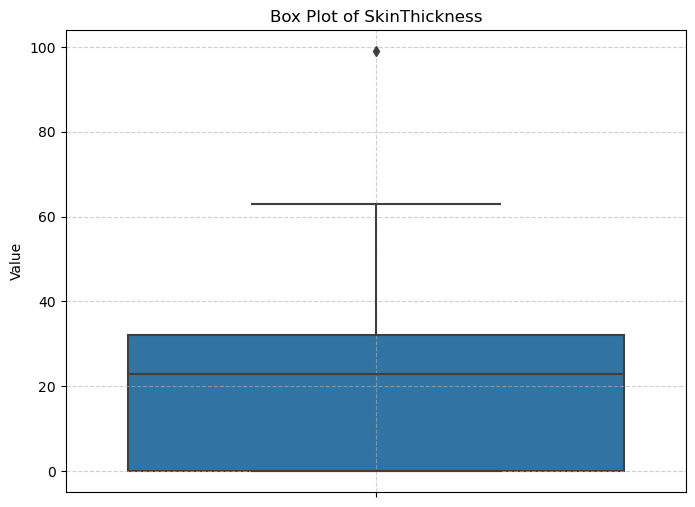

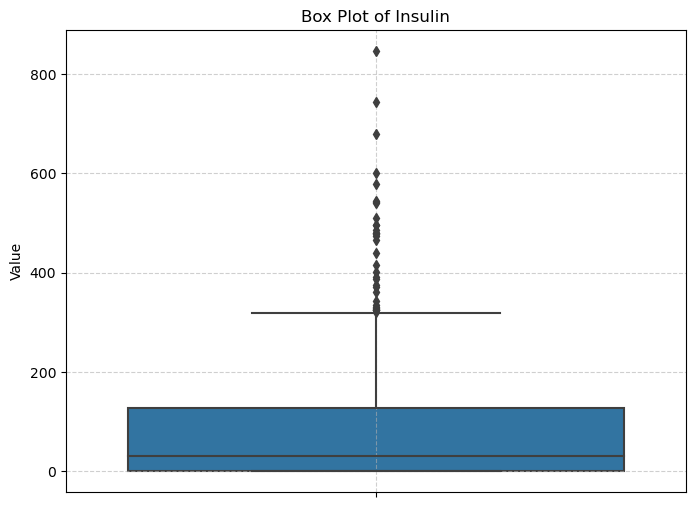

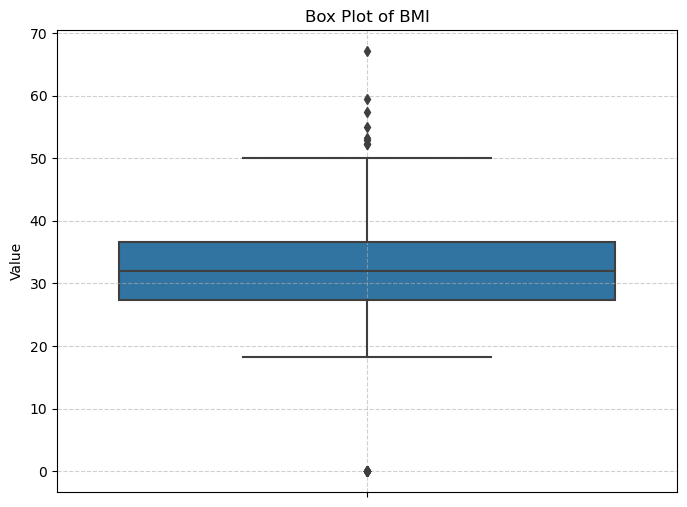

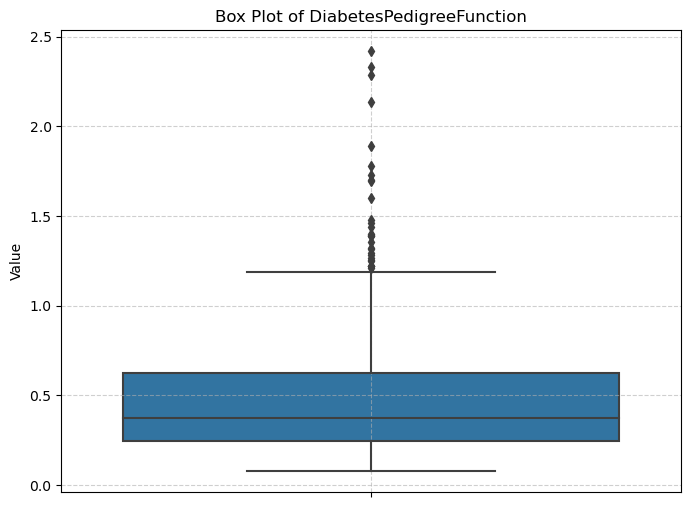

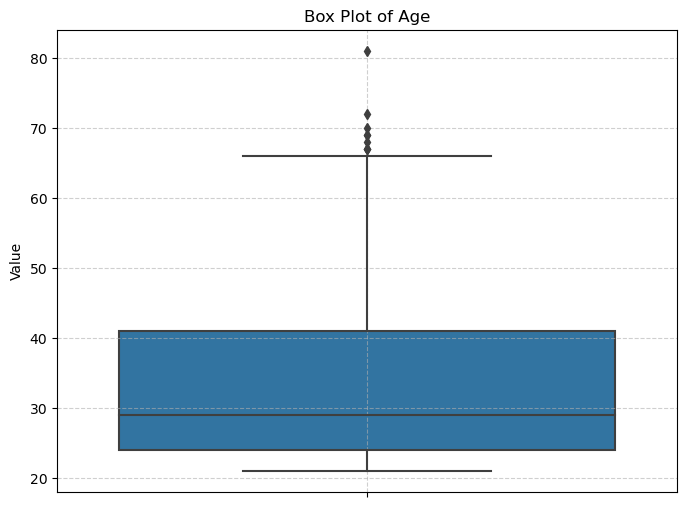

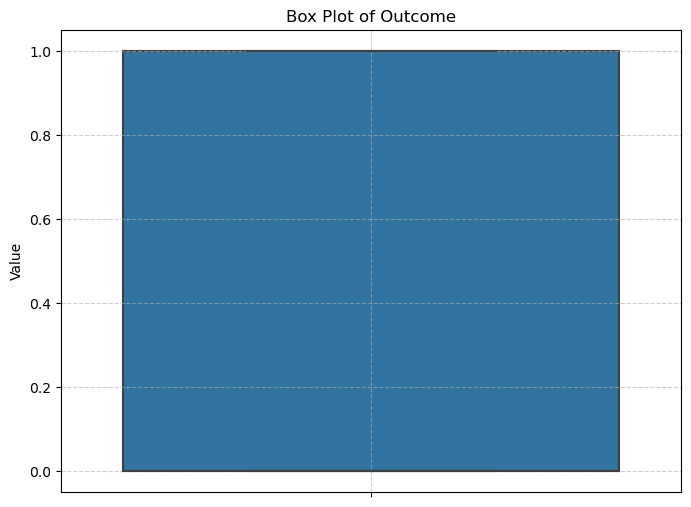

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Value')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

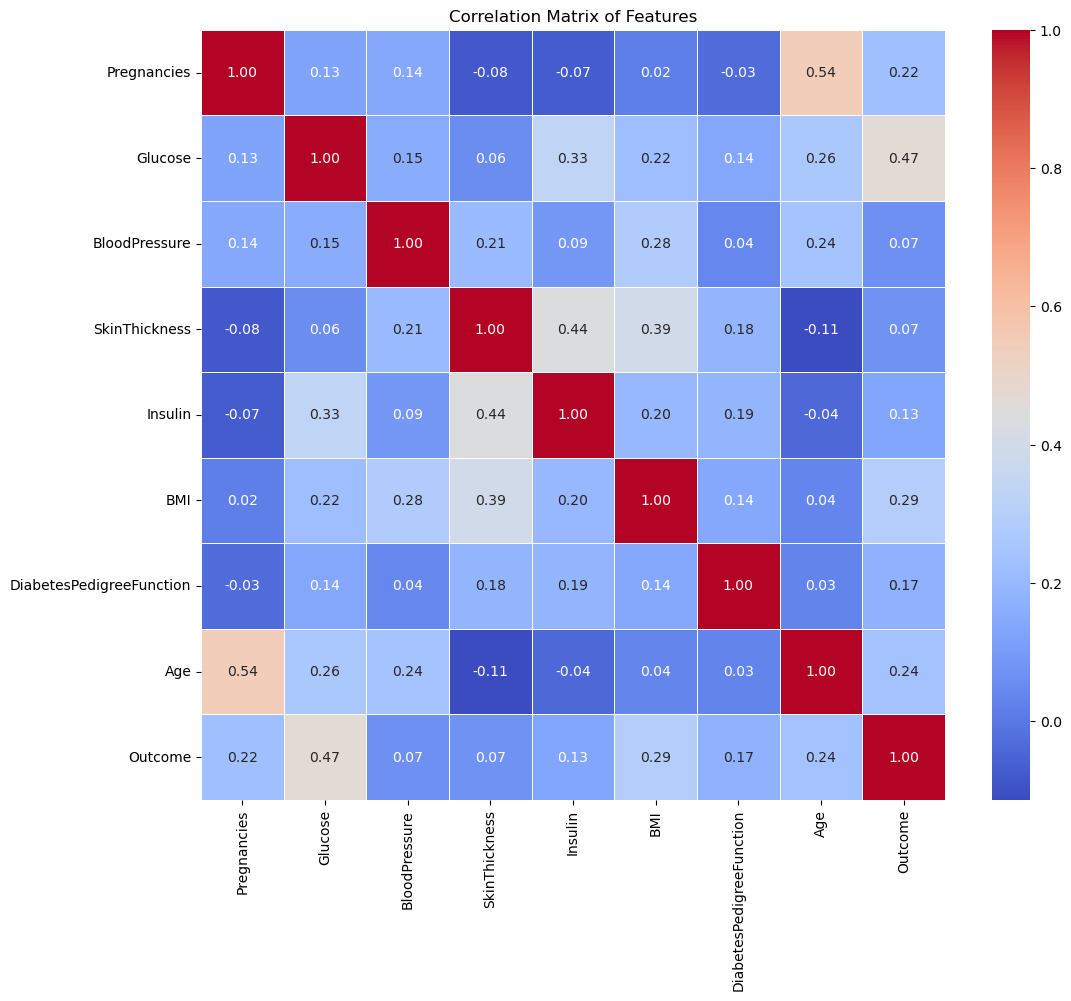

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 2. Data Preprocessing:

In [6]:
import numpy as np

# Define columns with potential implausible '0' values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace '0' values with NaN in the specified columns
for col in columns_with_zeros:
    df[col] = df[col].replace(0, np.nan)

# Impute missing values (NaN) with the median of each column
for col in columns_with_zeros:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("Implausible zero values replaced with NaN and then imputed with median for specified columns.")
print("Displaying the first 5 rows after imputation:")
display(df.head())

Implausible zero values replaced with NaN and then imputed with median for specified columns.
Displaying the first 5 rows after imputation:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
import numpy as np

# Define columns with potential implausible '0' values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace '0' values with NaN in the specified columns
for col in columns_with_zeros:
    df[col] = df[col].replace(0, np.nan)

# Impute missing values (NaN) with the median of each column
for col in columns_with_zeros:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("Implausible zero values replaced with NaN and then imputed with median for specified columns.")
print("Displaying the first 5 rows after imputation:")
display(df.head())

Implausible zero values replaced with NaN and then imputed with median for specified columns.
Displaying the first 5 rows after imputation:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) == 0:
    print("No categorical columns found. All features are numerical, so no categorical encoding is necessary.")
else:
    print(f"Categorical columns identified: {list(categorical_cols)}")
    # Further steps for encoding would go here if categorical columns were found


No categorical columns found. All features are numerical, so no categorical encoding is necessary.


# 3. Model Building:

In [9]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


# 4. Model Evaluation:

In [10]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model initialized and trained successfully.")

Logistic Regression model initialized and trained successfully.


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



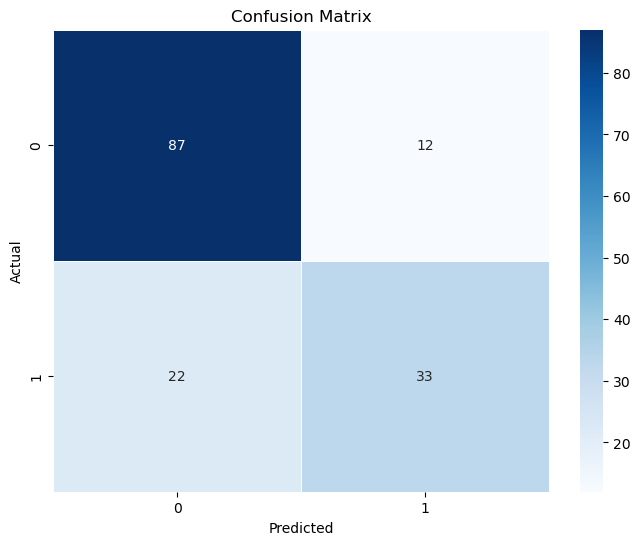

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# 3. Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 5., 6., 7., 8. Create and display the heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC-AUC Score: 0.82


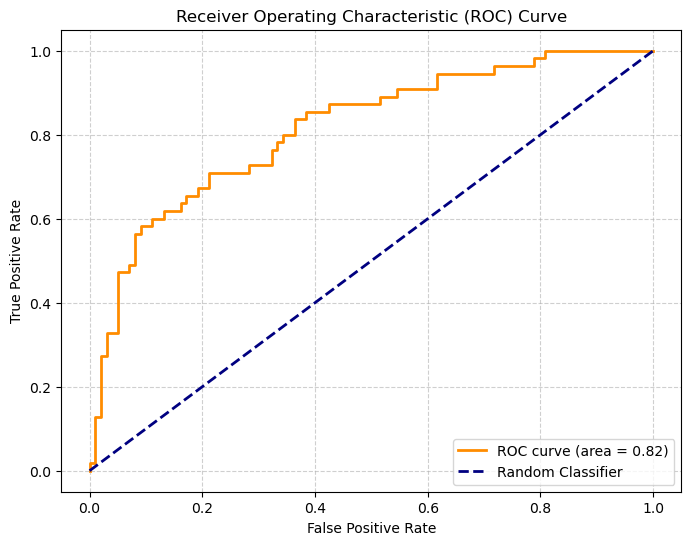


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



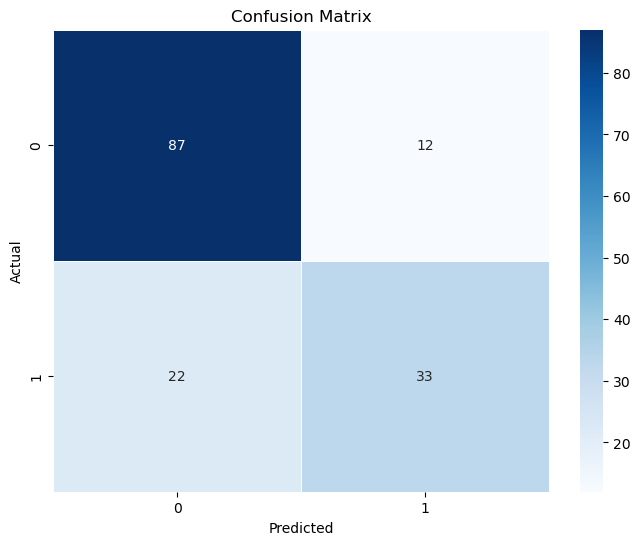

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predict probabilities for the positive class
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

# 2. Calculate ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# 3. Print the ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.2f}")

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 5. Make predictions on the test set (reusing y_pred from previous step)
y_pred = log_reg_model.predict(X_test)

# 6. Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 8. Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. Interpretation:

In [13]:
import pandas as pd

# Access coefficients and intercept
coefficients = log_reg_model.coef_[0]
intercept = log_reg_model.intercept_[0]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Add the intercept to the DataFrame
intercept_df = pd.DataFrame([{'Feature': 'Intercept', 'Coefficient': intercept}])
coef_df = pd.concat([coef_df, intercept_df], ignore_index=True)

print("Model Coefficients and Intercept:")
display(coef_df)

Model Coefficients and Intercept:


,Feature,Coefficient
0,Pregnancies,0.070864
1,Glucose,0.029265
2,BloodPressure,-0.030015
3,SkinThickness,0.000397
4,Insulin,-0.001110
5,BMI,0.070927
6,DiabetesPedigreeFunction,0.397542
7,Age,0.026086
8,Intercept,-5.587961


# 6. Deployment with Streamlit:

In [14]:
import joblib

# Define the filename for the model
model_filename = 'log_reg_model.pkl'

# Save the trained model to the file
joblib.dump(log_reg_model, model_filename)

print(f"Trained logistic regression model saved to '{model_filename}'")

Trained logistic regression model saved to 'log_reg_model.pkl'


In [15]:
%%writefile app.py

import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('log_reg_model.pkl')

st.title('Diabetes Prediction App')
st.write('Enter the patient\u0027s details to predict the likelihood of diabetes.')

# Create input fields for each feature
with st.sidebar:
    st.header('Patient Input Features')
    pregnancies = st.number_input('Pregnancies', min_value=0, max_value=17, value=3)
    glucose = st.number_input('Glucose (mg/dL)', min_value=44, max_value=199, value=120)
    blood_pressure = st.number_input('Blood Pressure (mmHg)', min_value=24, max_value=122, value=72)
    skin_thickness = st.number_input('Skin Thickness (mm)', min_value=7, max_value=99, value=29)
    insulin = st.number_input('Insulin (mu U/ml)', min_value=14, max_value=846, value=125)
    bmi = st.number_input('BMI (kg/m\u00b2)', min_value=18.0, max_value=67.0, value=32.0)
    diabetes_pedigree_function = st.number_input('Diabetes Pedigree Function', min_value=0.078, max_value=2.42, value=0.372)
    age = st.number_input('Age (years)', min_value=21, max_value=81, value=30)


# Create a DataFrame from user inputs
input_data = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]],
                            columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Prediction button
if st.button('Predict Diabetes'):
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)

    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.error(f'The model predicts: Diabetes (Probability: {prediction_proba[0][1]:.2f})')
        st.write('It is recommended to consult a medical professional for further evaluation.')
    else:
        st.success(f'The model predicts: No Diabetes (Probability: {prediction_proba[0][0]:.2f})')
        st.write('Based on the provided information, the likelihood of diabetes is low.')

# Optional: Display input data for verification
st.subheader('Entered Patient Data:')
st.write(input_data)

Overwriting app.py


# Interview Questions:

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the cross-validation strategy
# StratifiedKFold is used to preserve the percentage of samples for each class
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store scores for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Re-initialize and train the model for each fold to ensure independent evaluation
    fold_model = LogisticRegression(random_state=42, solver='liblinear')
    fold_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test fold
    y_pred_fold = fold_model.predict(X_test_fold)

    # Calculate metrics for the current fold
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold))
    recall_scores.append(recall_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold))

print(f"Cross-validation performed with {num_folds} folds.\n")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores):.4f})")
print(f"Average Precision: {np.mean(precision_scores):.4f} (+/- {np.std(precision_scores):.4f})")
print(f"Average Recall: {np.mean(recall_scores):.4f} (+/- {np.std(recall_scores):.4f})")
print(f"Average F1-Score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")

Cross-validation performed with 5 folds.

Average Accuracy: 0.7630 (+/- 0.0192)
Average Precision: 0.7152 (+/- 0.0492)
Average Recall: 0.5373 (+/- 0.0418)
Average F1-Score: 0.6123 (+/- 0.0339)


In [17]:
 # precision vs. Recall:
       # Precision measures the accuracy of positive predictions. It answers: "Of all the instances predicted as positive, how many are actually positive?" It's calculated as: True Positives / (True Positives + False Positives). High precision means a low false positive rate.
       # Recall (also known as Sensitivity) measures the ability of a model to find all the positive instances. It answers: "Of all the actual positive instances, how many did the model correctly identify?" It's calculated as: True Positives / (True Positives + False Negatives). High recall means a low false negative rate.
       # Key Difference: Precision focuses on the quality of positive predictions (avoiding false positives), while Recall focuses on the completeness of positive predictions (avoiding false negatives).

    #Cross-Validation and its Importance in Binary Classification:
        #Cross-Validation is a technique used to evaluate machine learning models and assess how well they generalize to an independent dataset. The most common form is k-fold cross-validation, where the dataset is split into k subsets (folds). The model is trained k times; each time, one fold is used as the test set, and the remaining k-1 folds are used as the training set. The performance metrics are then averaged across all k runs.
       # Importance in Binary Classification:
            #Robust Performance Estimation: It provides a more reliable estimate of a model's performance on unseen data compared to a single train-test split, reducing the variance of the performance estimate.
           # Reduced Overfitting: By training and testing on different subsets of data, it helps detect if a model is overfitting to the training data.
           # Optimal Hyperparameter Tuning: It is crucial for hyperparameter tuning. Hyperparameters are selected based on their performance across multiple folds, ensuring that the chosen parameters generalize well.
           # Handles Data Scarcity (Better Data Utilization): Especially important in binary classification where one class might be rare (imbalanced datasets). Cross-validation ensures that each data point eventually gets to be part of the test set, allowing for a more thorough evaluation of how the model handles both classes.
           # Unbiased Evaluation: It provides a less biased estimate of the model's true performance, as the evaluation is not dependent on a particular random train-test split.

#In essence, cross-validation ensures that the model evaluation is comprehensive and that the model is robust and generalizable to new, unseen data, which is critical for real-world applications of binary classification models.

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# Assuming 'df' is already loaded from diabetes.csv
# Let's create a simple dataset from the 'df' DataFrame
X = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate the model (optional, but good practice)
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nDummy model created and trained.")

Model Accuracy: 0.75

Dummy model created and trained.


In [26]:
model_filename = 'diabetes_prediction_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model successfully pickled and saved as '{model_filename}'")

Model successfully pickled and saved as 'diabetes_prediction_model.pkl'


In [27]:
loaded_model = None
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

if loaded_model:
    print(f"Model successfully loaded from '{model_filename}'")
    # You can now use 'loaded_model' for predictions in your Streamlit app
    # For example, making a prediction with some sample data:
    sample_data = pd.DataFrame([[100, 30, 45]], columns=['Glucose', 'BMI', 'Age'])
    prediction = loaded_model.predict(sample_data)
    print(f"Prediction for sample data: {prediction[0]} (0=No Diabetes, 1=Diabetes)")
else:
    print("Failed to load the model.")

Model successfully loaded from 'diabetes_prediction_model.pkl'
Prediction for sample data: 0 (0=No Diabetes, 1=Diabetes)


In [28]:
import pickle

pickle.dump(model, open("diabetes_prediction_model.pkl", "wb"))